In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
from typing import Any
from sklearn.metrics import r2_score

In [2]:
def initialize_params(dims: int) -> np.ndarray:
    """初始化模型参数

    Args:
        dims (int): 训练数据变量维度 (特征数量)

    Returns:
        np.ndarray: 含有权重和偏置的矩阵，其形状为 n + 1 x 1，n为特征的数量
    """
    return np.zeros((dims + 1, 1))

In [3]:
def l2_loss(
    X: np.ndarray,
    y: np.ndarray,
    w_hat: np.ndarray,
    alpha: float
) -> tuple[np.ndarray, float, np.ndarray, float]:
    """计算 LASSO 回归的预测值、L1 损失和梯度

    Args:
        X (np.ndarray): 输入变量矩阵
        y (np.ndarray): 输出标签向量
        w_hat (np.ndarray): 权重矩阵
        alpha (float): 正则化系数 (lambda)

    Returns:
        tuple[np.ndarray, float, np.ndarray, float]:
            y_hat: 线性模型预测输出
            loss: 均方损失值 + L1 正则化项
            grad: 权重 w 的梯度和偏置 b 的梯度组成的矩阵
    """
    X_b = np.hstack((X, np.ones((X.shape[0], 1))))

    y_hat = X_b @ w_hat

    loss = np.mean((y_hat - y) ** 2) + alpha * np.sum(w_hat[:-1] ** 2)

    dw = (X.T @ (y_hat - y))/ X.shape[0] + 2 * alpha * w_hat[:-1]

    db = np.mean(y_hat - y)

    grad = np.vstack((dw, db))

    return y_hat, loss, grad

In [4]:
def lasso_train(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    epochs: int = 1000
) -> tuple[list[float], dict[str, Any], dict[str, Any]]:

    """定义 LASSO 回归模型的训练过程

    Args:
        X (np.ndarray): 输入变量矩阵
        y (np.ndarray): 输出标签向量
        learning_rate (float, optional): 学习率. Defaults to 0.01.
        epochs (int, optional): 训练迭代次数. Defaults to 1000.

    Returns:
        tuple[list[float], dict[str, Any], dict[str, Any]]:
            loss_his: 每次迭代的 L1 损失列表
            params: 优化后的参数矩阵
            grad: 优化后的参数梯度矩阵
    """

    params = initialize_params(X.shape[1])

    loss_his = []
    for epoch in range(epochs):
        y_hat, loss, grad = l2_loss(X, y, params, 0.1)

        params = params - grad * learning_rate

        loss_his.append(loss)

    return loss_his, params, grad

In [5]:
def predict(X:np.ndarray, params:np.ndarray) -> np.ndarray:
    """预测函数

    Args:
        X (np.ndarray): 用于预测的变量
        params (np.ndarray): 用于预测的参数

    Returns:
        np.ndarray: 预测结果
    """
    X_b = np.hstack((X, np.ones((X.shape[0], 1))))

    y_pred = np.dot(X_b, params)
    return y_pred

In [6]:
url = 'https://data.wwtt.xyz/machine_learning_code_implementation/charpter4_regression_expansion/example.dat'

response = requests.get(url)

if response.status_code == 200:
	data = np.genfromtxt(io.BytesIO(response.content), delimiter=',')
else:
	print("读取失败，请检查 URL 或网络连接。")

# 选择特征与标签
X = data[:,0:100]
y = data[:,100].reshape(-1,1)

# 划分训练集与测试集
X_train, y_train = X[:70], y[:70]
X_test, y_test = X[70:], y[70:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(70, 100) (70, 1) (31, 100) (31, 1)


In [7]:
loss_list, params, grads = lasso_train(X_train, y_train, 0.01, 1000)

print(params)

[[-0.10056536]
 [ 0.39226097]
 [ 0.2708818 ]
 [ 0.14413456]
 [ 0.64126496]
 [-0.11784301]
 [ 0.63069818]
 [-0.24676868]
 [-0.01937577]
 [-0.00893337]
 [ 0.5985355 ]
 [ 0.05203279]
 [ 0.57328493]
 [ 0.07128365]
 [-0.24913953]
 [ 0.05820132]
 [ 0.3482672 ]
 [-0.05119725]
 [ 0.59658285]
 [ 0.0736838 ]
 [-0.00741688]
 [-0.08450882]
 [ 0.39074734]
 [-0.02227727]
 [-0.05227287]
 [-0.04381327]
 [-0.04732141]
 [-0.0542832 ]
 [ 0.36507071]
 [ 0.09405719]
 [ 0.13000781]
 [ 0.13071631]
 [ 0.13794405]
 [-0.11548583]
 [-0.03871089]
 [ 0.07596366]
 [-0.05815033]
 [-0.01523778]
 [-0.13156762]
 [-0.03876954]
 [ 0.04834822]
 [ 0.07623429]
 [ 0.02179482]
 [-0.06149012]
 [ 0.0665559 ]
 [ 0.04048001]
 [-0.1099143 ]
 [ 0.01391075]
 [ 0.16895735]
 [ 0.02215986]
 [-0.15189654]
 [ 0.1490796 ]
 [ 0.01673368]
 [-0.0235817 ]
 [-0.03204819]
 [ 0.25302973]
 [-0.04293907]
 [-0.29287521]
 [-0.29738094]
 [ 0.24514683]
 [ 0.09700348]
 [ 0.08345553]
 [ 0.10435699]
 [ 0.15297705]
 [-0.13968279]
 [ 0.03132341]
 [-0.08822

有效特征数量: 77
       Weight
0   -0.100565
1    0.392261
2    0.270882
3    0.144135
4    0.641265
..        ...
96   0.167702
97   0.090440
98  -0.244288
99   0.152673
100 -0.164421

[77 rows x 1 columns]


<Axes: title={'center': 'Significant Weights'}>

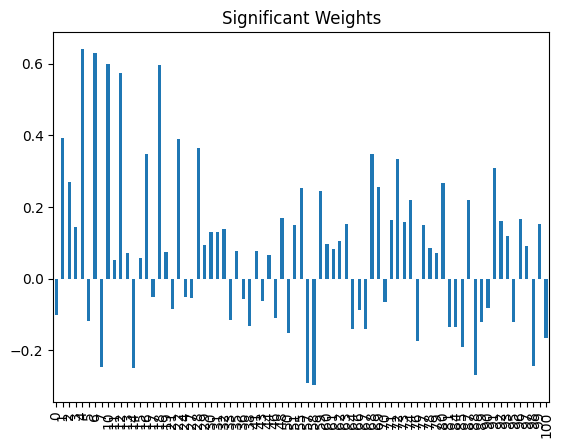

In [8]:
# 创建 DataFrame 方便查看
df = pd.DataFrame(params, columns=['Weight'])

# 1. 过滤掉噪音，只看绝对值大于 0.05 的行
significant = df[df['Weight'].abs() > 0.05]

print("有效特征数量:", len(significant))
print(significant)

# 2. 简单的可视化
significant['Weight'].plot(kind='bar', title='Significant Weights')

In [9]:
y_pred = predict(X_test, params)

In [10]:
print(r2_score(y_test, y_pred))

0.3798199259466516


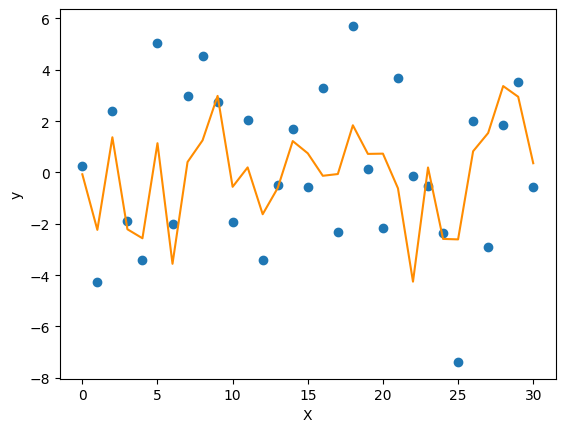

In [11]:
# 简单绘图

f = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) @ params

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show();

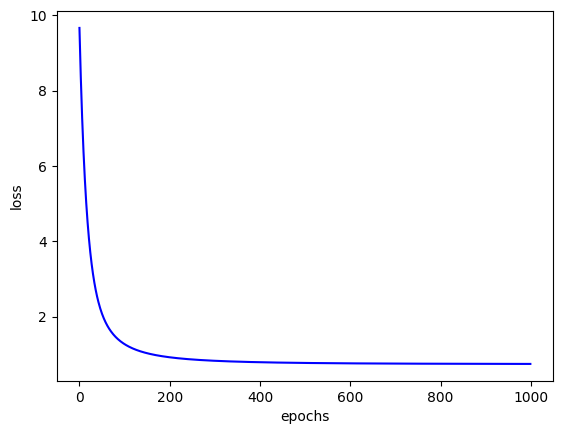

In [12]:
# 训练过程中的损失下降
plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()